The goal of this project is to use Social Determinants of Health (SDoH) data by county available from
[AHRQ](https://www.ahrq.gov/sdoh/data-analytics/sdoh-data.html) to look for relationships between specific variables and
ED visit rate. Ultimately, I'd like to develop a predictive model with the top features related to a high ED rate. I decided to look at 2019 and 2020 data (2018 was not available).


In [1]:
#import the data
import pandas as pd
df2020=pd.read_csv('Data/SDOHdata.csv', encoding= "ISO-8859-1")
df2019=pd.read_csv('Data/SDOH2019.csv', encoding= "ISO-8859-1")


Let's see the shape of the 3 dataframes.

In [2]:

print('2019 data: ', df2019.shape)
print('2020 data: ', df2020.shape)


2019 data:  (3232, 911)
2020 data:  (3229, 682)


Since they have a different number of columns, I'm going to import the data dictionaries and pull the columns that are the same.

In [3]:

dictionary2019=pd.read_csv('Data/datadictionary2019.csv', encoding= "ISO-8859-1")
dictionary2020=pd.read_csv('Data/datadictionary.csv', encoding= "ISO-8859-1")

In [4]:
commoncolumns=dictionary2020.merge(dictionary2019, how='inner', left_on='name', right_on='name')['name'].values.tolist()


In [5]:

dfa=df2019[commoncolumns]
dfb=df2020[commoncolumns]
df_final=pd.concat([dfa, dfb], axis=0)
df_final



,YEAR,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,...,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,CEN_AIAN_NH_IND
0,2019,1001,1,Alabama,Autauga County,South,0,55380.0,54699.0,52163.0,...,0.0,0.00,0.0,0.0,1.0,0.02,52.63,36.84,10.53,0.0
1,2019,1003,1,Alabama,Baldwin County,South,0,212830.0,210908.0,201141.0,...,0.0,0.00,1.0,0.0,4.0,0.02,63.49,36.51,0.00,0.0
2,2019,1005,1,Alabama,Barbour County,South,0,25361.0,25050.0,24012.0,...,0.0,0.00,0.0,0.0,1.0,0.04,73.33,20.00,6.67,0.0
3,2019,1007,1,Alabama,Bibb County,South,0,22493.0,22141.0,21178.0,...,1.0,0.04,0.0,0.0,1.0,0.04,42.86,35.71,21.43,0.0
4,2019,1009,1,Alabama,Blount County,South,0,57681.0,57191.0,54249.0,...,0.0,0.00,0.0,0.0,1.0,0.02,60.00,40.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,2020,72151,72,Puerto Rico,Yabucoa Municipio,NaN,1,32867.0,NaN,31669.0,...,0.0,0.00,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.0
3225,2020,72153,72,Puerto Rico,Yauco Municipio,NaN,1,34501.0,NaN,33194.0,...,0.0,0.00,0.0,0.0,1.0,0.03,66.67,33.33,0.00,0.0
3226,2020,78010,78,US Virgin Islands,St. Croix,NaN,1,NaN,NaN,NaN,...,0.0,0.00,0.0,0.0,1.0,0.00,57.14,42.86,0.00,0.0
3227,2020,78020,78,US Virgin Islands,St. John Island,NaN,1,NaN,NaN,NaN,...,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0


In [6]:
commoncolumns

['YEAR',
 'COUNTYFIPS',
 'STATEFIPS',
 'STATE',
 'COUNTY',
 'REGION',
 'TERRITORY',
 'ACS_TOT_POP_WT',
 'ACS_TOT_POP_US_ABOVE1',
 'ACS_TOT_POP_ABOVE5',
 'ACS_TOT_POP_ABOVE15',
 'ACS_TOT_POP_ABOVE16',
 'ACS_TOT_POP_16_19',
 'ACS_TOT_POP_ABOVE25',
 'ACS_TOT_CIVIL_POP_ABOVE18',
 'ACS_TOT_CIVIL_VET_POP_ABOVE25',
 'ACS_TOT_OWN_CHILD_BELOW17',
 'ACS_TOT_WORKER_NWFH',
 'ACS_TOT_WORKER_HH',
 'ACS_TOT_CIVILIAN_LABOR',
 'ACS_TOT_CIVIL_EMPLOY_POP',
 'ACS_TOT_POP_POV',
 'ACS_TOT_CIVIL_NONINST_POP_POV',
 'ACS_TOT_CIVIL_POP_POV',
 'ACS_TOT_GRANDCHILDREN_GP',
 'ACS_TOT_HU',
 'ACS_TOT_HH',
 'ACS_AVG_HH_SIZE',
 'ACS_TOT_CIVIL_NONINST_POP',
 'ACS_TOT_CIVIL_VET_POP',
 'ACS_PCT_CHILD_DISAB',
 'ACS_PCT_DISABLE',
 'ACS_PCT_NONVET_DISABLE_18_64',
 'ACS_PCT_VET_DISABLE_18_64',
 'ACS_PCT_MALE',
 'ACS_PCT_FEMALE',
 'ACS_PCT_CTZ_US_BORN',
 'ACS_PCT_CTZ_NONUS_BORN',
 'ACS_PCT_FOREIGN_BORN',
 'ACS_PCT_NON_CITIZEN',
 'ACS_PCT_CTZ_NATURALIZED',
 'ACS_PCT_CTZ_ABOVE18',
 'ACS_PCT_NONCTN_1990',
 'ACS_PCT_NONCTN_1999',


This data has 674 columns, so we are going to need to try to narrow down which features to look at. Let's start with my
variable of interest, the ED visit rate. The dataset includes - Emergency department visits per 1,000 male Medicare (dual and non-dual) beneficiaries. However, the data only provides the male rate and the female rate, so I am going to create a weighted sum for the overall ED rate based on the percentage of males and percentage of females in each county.


In [7]:
#print the average ED rates for Males and Females accross all locations
print('Male ED Rate: ', df_final['MMD_ED_VISITS_M_RATE'].mean())
print('Female ED Rate: ', df_final['MMD_ED_VISITS_F_RATE'].mean())

Male ED Rate:  597.1129158207091
Female ED Rate:  639.9023742580443


In [8]:
import numpy as np
#create an average overall ED rate by weighting the male and female rates by their percentage of the population and adding
df_final['Malerate']=(df_final['ACS_PCT_MALE']*df_final['MMD_ED_VISITS_M_RATE'])/100
df_final['Femalerate']=(df_final['ACS_PCT_FEMALE']*df_final['MMD_ED_VISITS_F_RATE'])/100
df_final['EDrate']=df_final['Malerate']+df_final['Femalerate']
#print the mean ED rate to use as our baseline for Good and Bad outcomes


In [9]:
df_final

,YEAR,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,...,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,CEN_AIAN_NH_IND,Malerate,Femalerate,EDrate
0,2019,1001,1,Alabama,Autauga County,South,0,55380.0,54699.0,52163.0,...,0.0,1.0,0.02,52.63,36.84,10.53,0.0,334.5744,385.2750,719.8494
1,2019,1003,1,Alabama,Baldwin County,South,0,212830.0,210908.0,201141.0,...,0.0,4.0,0.02,63.49,36.51,0.00,0.0,282.5403,317.9803,600.5206
2,2019,1005,1,Alabama,Barbour County,South,0,25361.0,25050.0,24012.0,...,0.0,1.0,0.04,73.33,20.00,6.67,0.0,440.8236,475.9788,916.8024
3,2019,1007,1,Alabama,Bibb County,South,0,22493.0,22141.0,21178.0,...,0.0,1.0,0.04,42.86,35.71,21.43,0.0,408.9314,373.8174,782.7488
4,2019,1009,1,Alabama,Blount County,South,0,57681.0,57191.0,54249.0,...,0.0,1.0,0.02,60.00,40.00,0.00,0.0,303.8100,404.2940,708.1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,2020,72151,72,Puerto Rico,Yabucoa Municipio,NaN,1,32867.0,NaN,31669.0,...,0.0,0.0,0.00,100.00,0.00,0.00,0.0,167.7051,210.2969,378.0020
3225,2020,72153,72,Puerto Rico,Yauco Municipio,NaN,1,34501.0,NaN,33194.0,...,0.0,1.0,0.03,66.67,33.33,0.00,0.0,307.2254,215.1464,522.3718
3226,2020,78010,78,US Virgin Islands,St. Croix,NaN,1,NaN,NaN,NaN,...,0.0,1.0,0.00,57.14,42.86,0.00,0.0,NaN,NaN,NaN
3227,2020,78020,78,US Virgin Islands,St. John Island,NaN,1,NaN,NaN,NaN,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,NaN,NaN,NaN


We can see that there is missing data for some of the counties. For this project, we will drop rows with a missing value
for the ED rate calculation because that means they did not have data related to emergency visits. Then we will find the
90th percentile for the dataset to use as a cutoff point for 'high ED rate'.


In [10]:
#drop missing values for ED rate so we can calculate the 80th percentile
df_final.dropna(subset=['EDrate'], inplace=True)
np.percentile(df_final['EDrate'], 80)

730.6611

In [11]:
#create cutoff value for high EDrate
cutoff=np.percentile(df_final['EDrate'], 80)
#if ED rate is greater than the 50th percentile then flag as high or else 0 for low
df_final['HighED']=np.where(df_final['EDrate']>cutoff, 1, 0)

Now let's start handling all the other missing data.


In [12]:
# drop columns with >10% missing
df_final.dropna(thresh=0.90*len(df_final),axis=1, inplace=True)
df_final


,YEAR,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,...,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,CEN_AIAN_NH_IND,Malerate,Femalerate,EDrate,HighED
0,2019,1001,1,Alabama,Autauga County,South,0,55380.0,54699.0,52163.0,...,1.0,0.02,52.63,36.84,10.53,0.0,334.5744,385.2750,719.8494,0
1,2019,1003,1,Alabama,Baldwin County,South,0,212830.0,210908.0,201141.0,...,4.0,0.02,63.49,36.51,0.00,0.0,282.5403,317.9803,600.5206,0
2,2019,1005,1,Alabama,Barbour County,South,0,25361.0,25050.0,24012.0,...,1.0,0.04,73.33,20.00,6.67,0.0,440.8236,475.9788,916.8024,1
3,2019,1007,1,Alabama,Bibb County,South,0,22493.0,22141.0,21178.0,...,1.0,0.04,42.86,35.71,21.43,0.0,408.9314,373.8174,782.7488,1
4,2019,1009,1,Alabama,Blount County,South,0,57681.0,57191.0,54249.0,...,1.0,0.02,60.00,40.00,0.00,0.0,303.8100,404.2940,708.1040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,2020,72145,72,Puerto Rico,Vega Baja Municipio,NaN,1,51089.0,NaN,48905.0,...,1.0,0.02,60.00,40.00,0.00,0.0,276.7620,266.7420,543.5040,0
3222,2020,72147,72,Puerto Rico,Vieques Municipio,NaN,1,8508.0,NaN,8075.0,...,0.0,0.00,100.00,0.00,0.00,0.0,160.2560,204.9600,365.2160,0
3223,2020,72149,72,Puerto Rico,Villalba Municipio,NaN,1,21899.0,NaN,20844.0,...,0.0,0.00,100.00,0.00,0.00,0.0,207.4215,243.2715,450.6930,0
3224,2020,72151,72,Puerto Rico,Yabucoa Municipio,NaN,1,32867.0,NaN,31669.0,...,0.0,0.00,100.00,0.00,0.00,0.0,167.7051,210.2969,378.0020,0


In [13]:
#list columns remaining with missing values
df_final.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by='counts', ascending=False)

,counts
ACS_PCT_POV_ASIAN,612
CHR_MENTAL_PROV_RATE,597
ACS_PCT_POV_AIAN,589
ACS_PCT_ASIAN_MALE,539
ACS_PCT_ASIAN_FEMALE,539
...,...
ACS_MEDIAN_HH_INC,1
ACS_PCT_NO_WORK_NO_SCHL_16_19,1
ACS_PCT_HH_1FAM_FOOD_STMP,1
ACS_MEDIAN_NONVET_INC,1


Let's try a simple imputer with the mean for all columns that are type float. First we will need to split our data into a training and testing set.


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
columns=df_final.loc[:, df_final.dtypes == float].columns.values
X_train, X_test, y_train, y_test = train_test_split( df_final.index, df_final['HighED'], stratify=df_final['HighED'], test_size=0.25,  random_state=42)
df_train=df_final.iloc[X_train]
df_test=df_final.iloc[X_test]
imp = SimpleImputer( strategy='mean')
df_impute_train=df_train[columns].copy(deep=True)
df_impute_test=df_test[columns].copy(deep=True)
df_impute_train[:]=imp.fit_transform(df_train[columns])
df_impute_test[:]=imp.fit_transform(df_test[columns])
  
df_impute_train



,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,...,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,CEN_AIAN_NH_IND,Malerate,Femalerate,EDrate
1179,292307.0,289758.0,278267.0,247230.0,244086.0,14377.0,211601.0,236677.0,16765.0,50713.0,...,0.02,10.0,0.03,70.45,27.27,2.27,0.0,336.1743,356.3108,692.4851
2456,23101.0,22920.0,21987.0,19329.0,19100.0,1199.0,16634.0,18397.0,1624.0,3779.0,...,0.00,0.0,0.00,75.00,25.00,0.00,0.0,237.7110,300.5955,538.3065
383,536487.0,531419.0,511129.0,458141.0,452651.0,23950.0,397329.0,441119.0,50061.0,81660.0,...,0.01,7.0,0.01,64.36,34.04,1.60,0.0,313.3982,347.0302,660.4284
617,17407.0,17165.0,16512.0,14535.0,14386.0,838.0,12655.0,13878.0,1226.0,3143.0,...,0.06,2.0,0.11,78.57,21.43,0.00,0.0,378.2526,428.4054,806.6580
340,13516.0,13474.0,13088.0,11722.0,11545.0,670.0,10212.0,11436.0,1500.0,1810.0,...,0.00,0.0,0.00,100.00,0.00,0.00,1.0,396.1428,286.1936,682.3364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,117894.0,116704.0,111829.0,98453.0,97122.0,7871.0,75456.0,94356.0,7445.0,21788.0,...,0.02,2.0,0.02,38.10,47.62,14.29,1.0,354.4125,381.8125,736.2250
1185,57550.0,56983.0,55002.0,48889.0,48172.0,2612.0,42832.0,46770.0,4746.0,9197.0,...,0.05,4.0,0.07,83.33,16.67,0.00,1.0,376.6566,404.5600,781.2166
2422,5458.0,5392.0,5140.0,4410.0,4340.0,225.0,3900.0,4201.0,210.0,1165.0,...,0.18,2.0,0.37,88.89,11.11,0.00,1.0,231.2376,307.0767,538.3143
746,46461.0,45963.0,43514.0,36886.0,36024.0,2546.0,30735.0,34670.0,2483.0,10375.0,...,0.02,5.0,0.11,65.63,25.00,9.38,0.0,267.5176,322.0787,589.5963


Next we will select all of the columns with a dtype of float so that we can run correlations between each feature and
the target feature. Based on the correlation, we will set a threshold and keep columns that are significantly positively
correlated or negatively correlated with EDrate.


In [15]:
#print positive correlations over .2 (small-moderate effect size)
def positivecorrelations(threshold=.2):
    columns=df_impute_train.columns.values
    positivecolumns=[]
    for col in columns:        
        if df_impute_train['EDrate'].corr(df_impute_train[col])>threshold:
            positivecolumns.append(col)
    return positivecolumns
       
poscols=(positivecorrelations())


In [16]:
#print negative correlations less than -.2 (small-moderate effect size)
def negativecorrelations(threshold=-.2):
    columns=df_impute_train.columns.values
    negativecolumns=[]
    for col in columns:        
        if df_impute_train['EDrate'].corr(df_impute_train[col])<threshold:
            negativecolumns.append(col)
    return negativecolumns
       
negcols=(negativecorrelations())


In [17]:
#make a final list of significant columns
sigcols=poscols+negcols
print(sigcols)
len(sigcols)

['ACS_PCT_CHILD_DISAB', 'ACS_PCT_DISABLE', 'ACS_PCT_NONVET_DISABLE_18_64', 'ACS_PCT_BLACK', 'ACS_PCT_BLACK_NONHISP', 'ACS_PCT_HOUSEHOLDER_BLACK', 'ACS_PCT_BLACK_COMB', 'ACS_PCT_CHILD_1FAM', 'ACS_PCT_CHILDREN_GRANDPARENT', 'ACS_PCT_HH_KID_1PRNT', 'ACS_PCT_HH_NO_COMP_DEV', 'ACS_PCT_HH_SMARTPHONE_ONLY', 'ACS_PCT_HH_NO_INTERNET', 'ACS_PCT_DIVORCED_F', 'ACS_PCT_DIVORCED_M', 'ACS_PCT_MARRIED_SP_AB_F', 'ACS_PCT_MARRIED_SP_AB_M', 'ACS_PCT_NVR_MARRIED_M', 'ACS_PCT_PVT_PROFIT', 'ACS_PCT_UNEMPLOY', 'ACS_PCT_NOT_LABOR', 'ACS_GINI_INDEX', 'ACS_PCT_INC50_BELOW17', 'ACS_PCT_HEALTH_INC_BELOW137', 'ACS_PCT_HH_INC_10000', 'ACS_PCT_HH_INC_14999', 'ACS_PCT_HH_INC_24999', 'ACS_PCT_INC50', 'ACS_PCT_NONVET_POV_18_64', 'ACS_PCT_PERSON_INC_100_124', 'ACS_PCT_PERSON_INC_125_199', 'ACS_PCT_PERSON_INC_BELOW99', 'ACS_PCT_HH_1FAM_FOOD_STMP', 'ACS_PCT_HH_FOOD_STMP', 'ACS_PCT_HH_PUB_ASSIST', 'ACS_PCT_HH_FOOD_STMP_BLW_POV', 'ACS_PCT_HS_GRADUATE', 'ACS_PCT_LT_HS', 'ACS_PCT_VET_HS', 'ACS_PCT_HU_MOBILE_HOME', 'ACS_PCT_RE

172

In [18]:
# Count total NaN at each column in a DataFrame - we can confirm that they've all been filled
print(" \nMissing values in each column: \n\n",
      df_impute_train[sigcols].isnull().sum())

 
Missing values in each column: 

 ACS_PCT_CHILD_DISAB             0
ACS_PCT_DISABLE                 0
ACS_PCT_NONVET_DISABLE_18_64    0
ACS_PCT_BLACK                   0
ACS_PCT_BLACK_NONHISP           0
                               ..
POS_MEDIAN_DIST_ED              0
POS_MEAN_DIST_ED                0
POS_MIN_DIST_ED                 0
POS_MAX_DIST_ED                 0
POS_MIN_DIST_CLINIC             0
Length: 172, dtype: int64


We want to make sure that we're not including any variables that contain ED so we will filter all of those columns in
addition to our calculated Femalerate and Malerate out of our list with the code below.


In [19]:
stringVal = "ED"
sigcols.remove('Femalerate')
sigcols.remove('Malerate')
finalcols=[x for x in sigcols if stringVal not in x]

len(finalcols)

140

In [20]:
finalcols

['ACS_PCT_CHILD_DISAB',
 'ACS_PCT_DISABLE',
 'ACS_PCT_NONVET_DISABLE_18_64',
 'ACS_PCT_BLACK',
 'ACS_PCT_BLACK_NONHISP',
 'ACS_PCT_HOUSEHOLDER_BLACK',
 'ACS_PCT_BLACK_COMB',
 'ACS_PCT_CHILD_1FAM',
 'ACS_PCT_CHILDREN_GRANDPARENT',
 'ACS_PCT_HH_KID_1PRNT',
 'ACS_PCT_HH_NO_COMP_DEV',
 'ACS_PCT_HH_SMARTPHONE_ONLY',
 'ACS_PCT_HH_NO_INTERNET',
 'ACS_PCT_PVT_PROFIT',
 'ACS_PCT_UNEMPLOY',
 'ACS_PCT_NOT_LABOR',
 'ACS_GINI_INDEX',
 'ACS_PCT_INC50_BELOW17',
 'ACS_PCT_HEALTH_INC_BELOW137',
 'ACS_PCT_HH_INC_10000',
 'ACS_PCT_HH_INC_14999',
 'ACS_PCT_HH_INC_24999',
 'ACS_PCT_INC50',
 'ACS_PCT_NONVET_POV_18_64',
 'ACS_PCT_PERSON_INC_100_124',
 'ACS_PCT_PERSON_INC_125_199',
 'ACS_PCT_PERSON_INC_BELOW99',
 'ACS_PCT_HH_1FAM_FOOD_STMP',
 'ACS_PCT_HH_FOOD_STMP',
 'ACS_PCT_HH_PUB_ASSIST',
 'ACS_PCT_HH_FOOD_STMP_BLW_POV',
 'ACS_PCT_HS_GRADUATE',
 'ACS_PCT_LT_HS',
 'ACS_PCT_VET_HS',
 'ACS_PCT_HU_MOBILE_HOME',
 'ACS_PCT_RENTER_HU_CHILD',
 'ACS_PCT_RENTER_HU_COST_30PCT',
 'ACS_PCT_HU_ELEC',
 'ACS_PCT_HU_NO_VEH

We've narrowed our dataset down to 140 columns. But now that I'm looking at the list of columns, I see that we should
also exclude anything with \_IP (inpatient), _PA (post-acute), and _EM(E&M)too. We're also not interested in the min and max temperature per month, so
I'll go ahead and drop those colums.


In [21]:
stringVal = "_IP"

finalcols=[x for x in finalcols if stringVal not in x]
stringVal2="TEMP_"

finalcols=[x for x in finalcols if stringVal2 not in x]
stringVal3="_PA"
stringVal4="_EM"

finalcols=[x for x in finalcols if stringVal3 not in x]
finalcols=[x for x in finalcols if stringVal4 not in x]
len(finalcols)

97

In [22]:
finalcols

['ACS_PCT_CHILD_DISAB',
 'ACS_PCT_DISABLE',
 'ACS_PCT_NONVET_DISABLE_18_64',
 'ACS_PCT_BLACK',
 'ACS_PCT_BLACK_NONHISP',
 'ACS_PCT_HOUSEHOLDER_BLACK',
 'ACS_PCT_BLACK_COMB',
 'ACS_PCT_CHILD_1FAM',
 'ACS_PCT_CHILDREN_GRANDPARENT',
 'ACS_PCT_HH_KID_1PRNT',
 'ACS_PCT_HH_NO_COMP_DEV',
 'ACS_PCT_HH_SMARTPHONE_ONLY',
 'ACS_PCT_HH_NO_INTERNET',
 'ACS_PCT_PVT_PROFIT',
 'ACS_PCT_UNEMPLOY',
 'ACS_PCT_NOT_LABOR',
 'ACS_GINI_INDEX',
 'ACS_PCT_INC50_BELOW17',
 'ACS_PCT_HEALTH_INC_BELOW137',
 'ACS_PCT_HH_INC_10000',
 'ACS_PCT_HH_INC_14999',
 'ACS_PCT_HH_INC_24999',
 'ACS_PCT_INC50',
 'ACS_PCT_NONVET_POV_18_64',
 'ACS_PCT_PERSON_INC_100_124',
 'ACS_PCT_PERSON_INC_125_199',
 'ACS_PCT_PERSON_INC_BELOW99',
 'ACS_PCT_HH_1FAM_FOOD_STMP',
 'ACS_PCT_HH_FOOD_STMP',
 'ACS_PCT_HH_PUB_ASSIST',
 'ACS_PCT_HH_FOOD_STMP_BLW_POV',
 'ACS_PCT_HS_GRADUATE',
 'ACS_PCT_LT_HS',
 'ACS_PCT_VET_HS',
 'ACS_PCT_HU_MOBILE_HOME',
 'ACS_PCT_RENTER_HU_CHILD',
 'ACS_PCT_RENTER_HU_COST_30PCT',
 'ACS_PCT_HU_ELEC',
 'ACS_PCT_HU_NO_VEH

Based on this output, it looks like there are some features that are measuring very similar things(i.e. estimated percentages overall vs. aged X-Y). Let's drop the columns that specify age ranges if the overall value is there. In addition, it looks like the PQI is repeated for all different subsets of the population, so we will want to take the weighted sum to find the overall rate by using M and F rates like we did earlier with the EDrate.

In [23]:
finalcols=[x for x in finalcols if x not in ('ACS_PCT_PRIVATE_SELF_BELOW64', 'ACS_PCT_PRIVATE_SELF','SAIPE_PCT_POV_0_17', 'ACS_PCT_PRIVATE_ANY_BELOW64', 'SAIPE_PCT_POV_5_17', 'NEPHTN_HEATIND_90', 'NEPHTN_HEATIND_95', 'NEPHTN_HEATIND_100')]


df_impute_train.loc[:, 'MalePQI']=(df_impute_train['ACS_PCT_MALE']*df_impute_train['MMD_OVERALL_PQI_M_RATE'])/100
df_impute_train.loc[:, 'FemalePQI']=(df_impute_train['ACS_PCT_FEMALE']*df_impute_train['MMD_OVERALL_PQI_F_RATE'])/100
df_impute_train.loc[:, 'PQI']=df_impute_train['MalePQI']+df_impute_train['FemalePQI']
df_impute_train['PQI'].describe()

df_impute_test.loc[:, 'MalePQI']=(df_impute_test['ACS_PCT_MALE']*df_impute_test['MMD_OVERALL_PQI_M_RATE'])/100
df_impute_test.loc[:, 'FemalePQI']=(df_impute_test['ACS_PCT_FEMALE']*df_impute_test['MMD_OVERALL_PQI_F_RATE'])/100
df_impute_test.loc[:, 'PQI']=df_impute_test['MalePQI']+df_impute_test['FemalePQI']
df_impute_test['PQI'].describe()

rate="_RATE"
finalcols=[x for x in finalcols if rate not in x]
race="ACS_PCT_BLACK_"
finalcols=[x for x in finalcols if race not in x]

dictionary2020[['name', 'label']][dictionary2020['name'].isin(finalcols)]


,name,label
30,ACS_PCT_CHILD_DISAB,Percentage of children with a disability (ages...
31,ACS_PCT_DISABLE,Percentage of population with a disability
32,ACS_PCT_NONVET_DISABLE_18_64,Percentage of nonveterans with a disability (b...
84,ACS_PCT_BLACK,Percentage of population reporting Black or Af...
103,ACS_PCT_WHITE,Percentage of population reporting White race ...
...,...,...
603,MMD_ANXIETY_DISD,Prevalence of anxiety disorders among Medicare...
604,MMD_BIPOLAR_DISD,Prevalence of bipolar disorder among Medicare ...
605,MMD_DEPR_DISD,Prevalence of depressive disorders among Medic...
607,MMD_OUD_IND,Prevalence of the overarching Opioid Use Disor...


In [24]:
finalcols
len(finalcols)

78

Now we have 78 columns. Let's take a look at some of the scatterplots against the ED rate.


In [25]:
#the labels are very long so I'm going to change the max_colwidth
pd.set_option('display.max_colwidth', None) 
dictionary2019[['name', 'label']][dictionary2019['name'].isin(finalcols)]


,name,label
30,ACS_PCT_CHILD_DISAB,Percentage of children with a disability (ages 17 and below)
31,ACS_PCT_DISABLE,Percentage of population with a disability
32,ACS_PCT_NONVET_DISABLE_18_64,Percentage of nonveterans with a disability (between ages 18 and 64)
84,ACS_PCT_BLACK,Percentage of population reporting Black or African American race alone
103,ACS_PCT_WHITE,Percentage of population reporting White race alone
...,...,...
831,MMD_ANXIETY_DISD,Prevalence of anxiety disorders among Medicare (dual and non-dual) beneficiaries
832,MMD_BIPOLAR_DISD,Prevalence of bipolar disorder among Medicare (dual and non-dual) beneficiaries
833,MMD_DEPR_DISD,Prevalence of depressive disorders among Medicare (dual and non-dual) beneficiaries
835,MMD_OUD_IND,Prevalence of the overarching Opioid Use Disorder (OUD) indicator among Medicare (dual and non-dual) beneficiaries


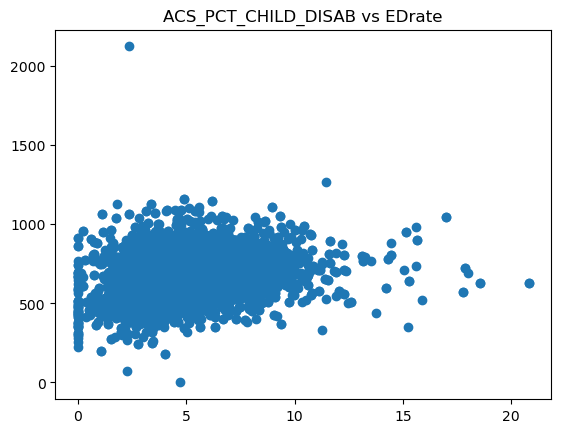

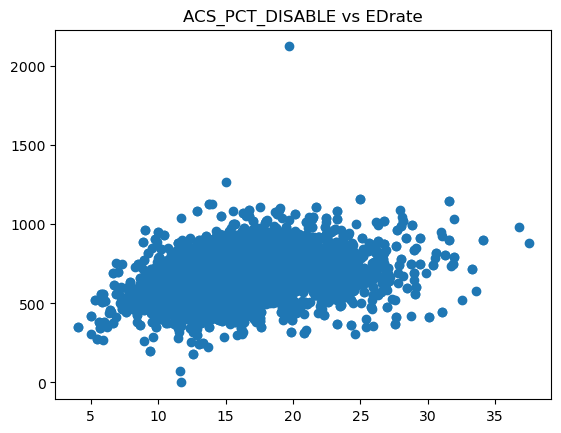

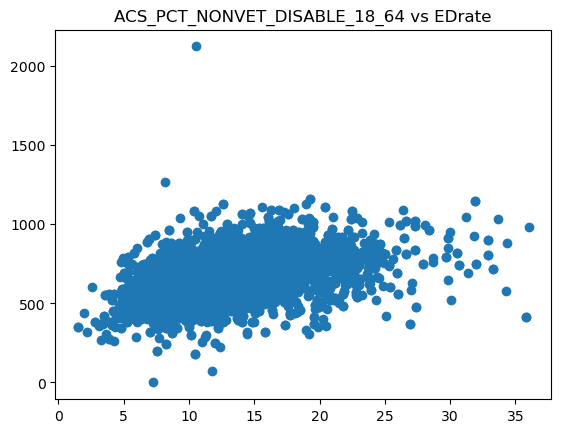

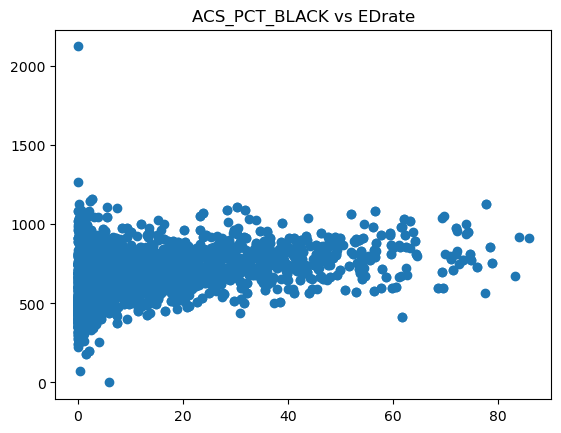

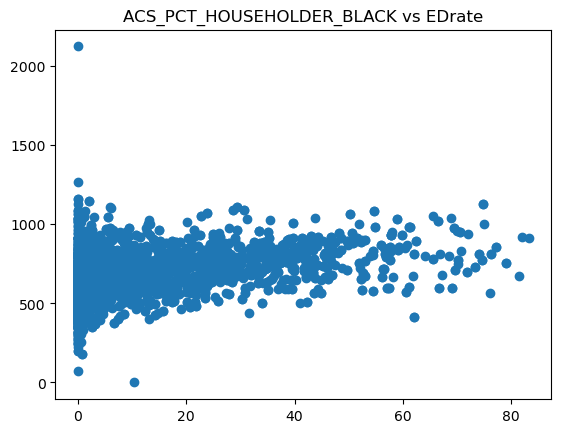

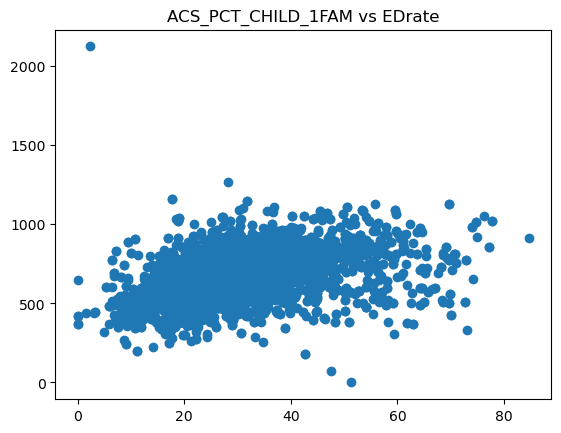

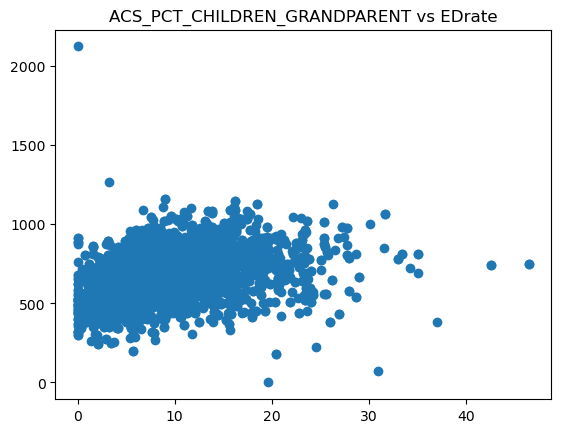

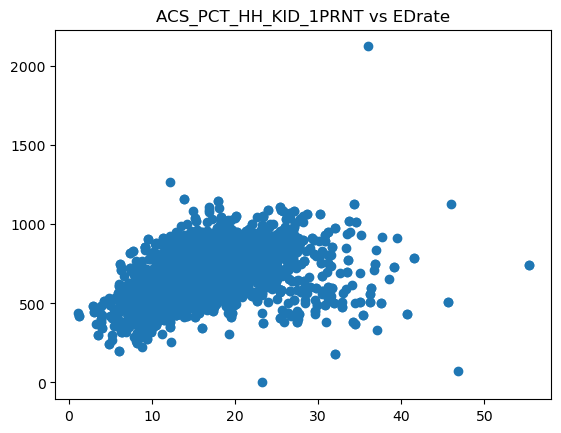

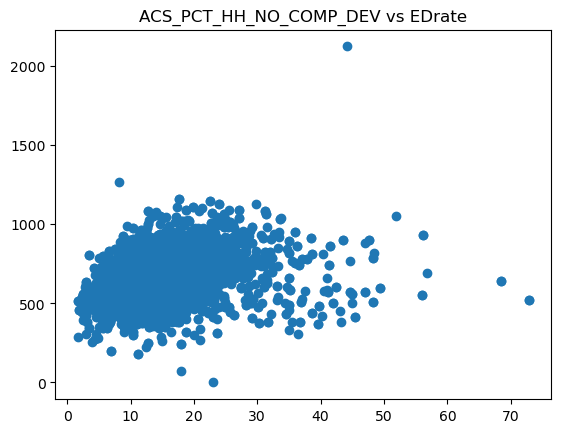

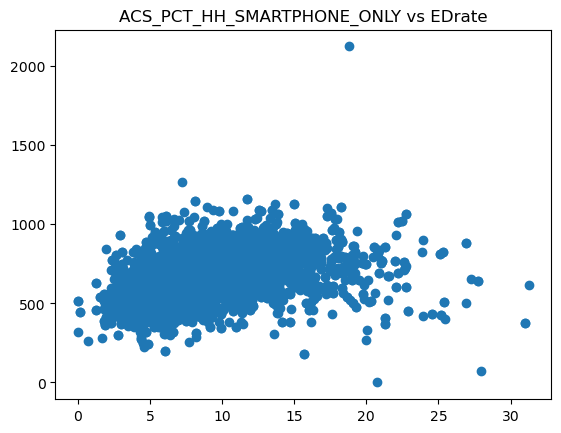

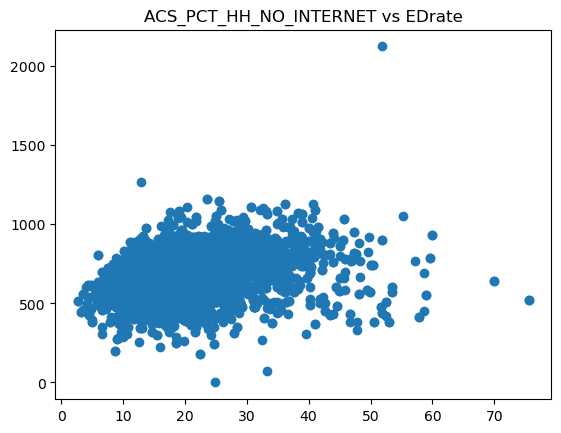

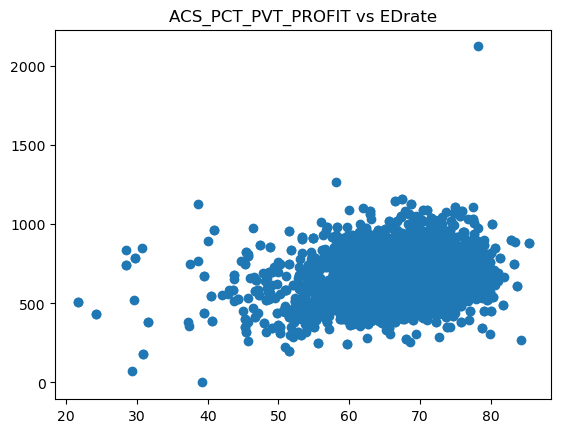

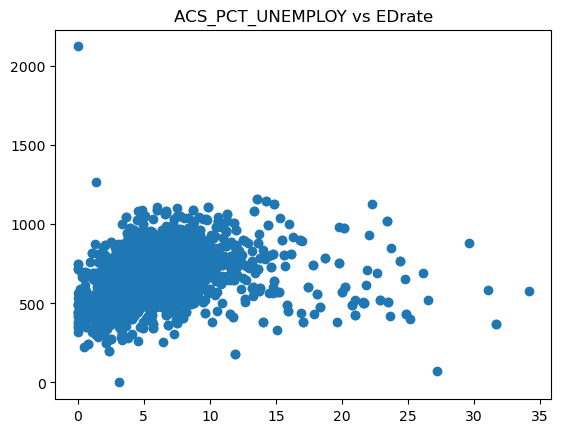

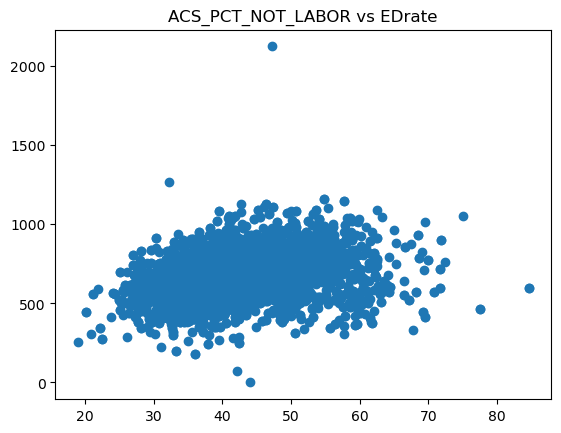

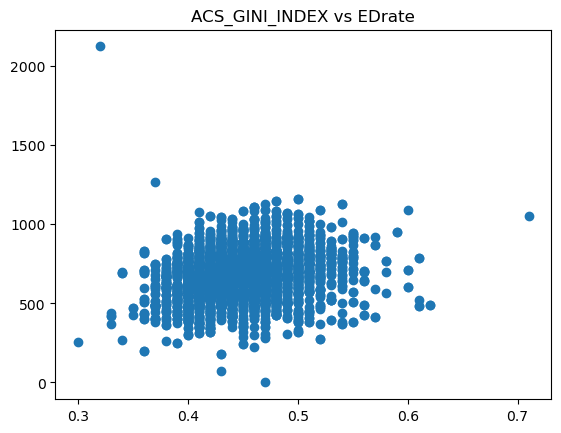

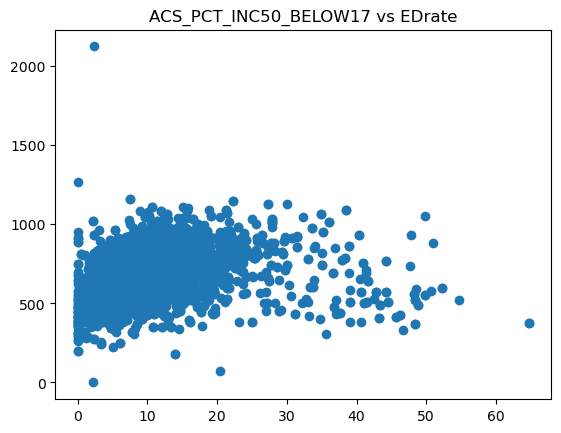

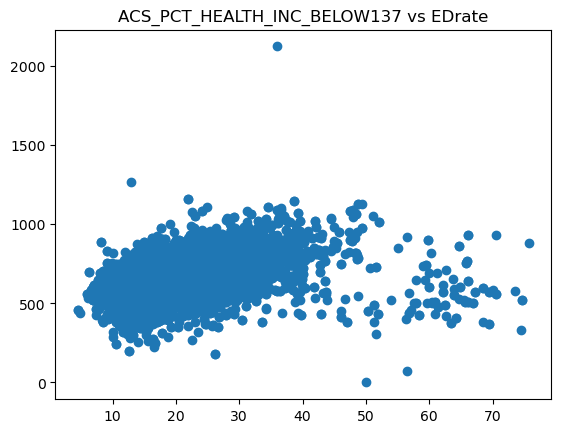

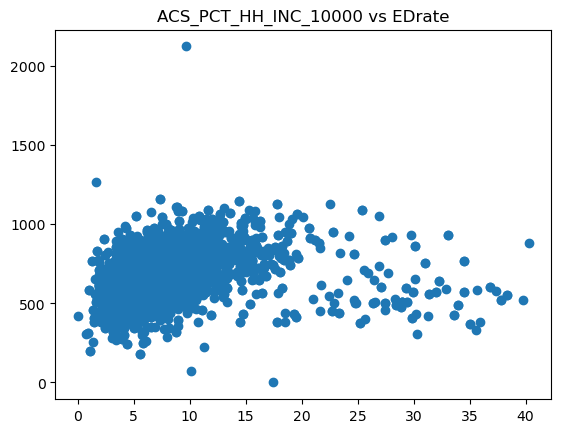

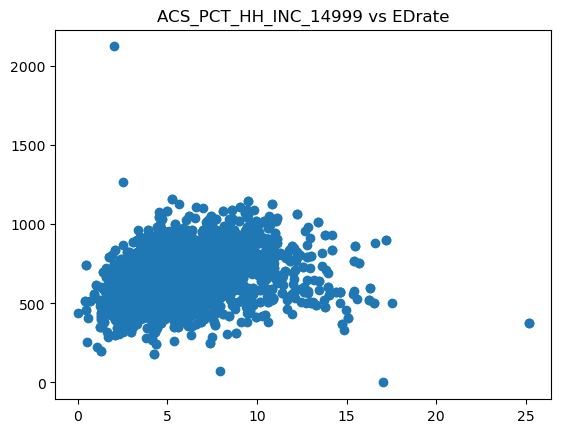

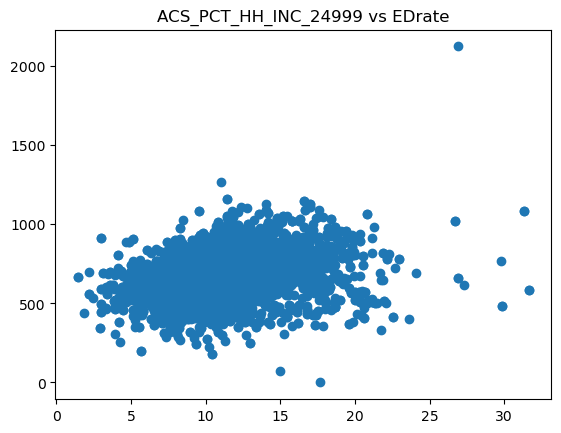

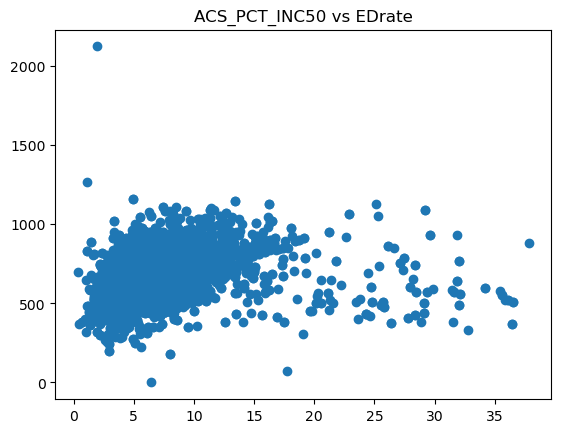

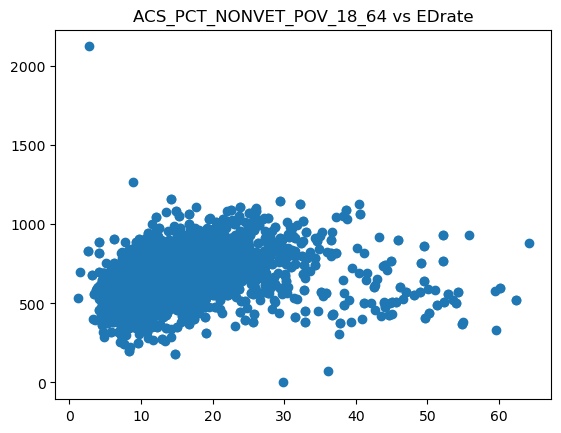

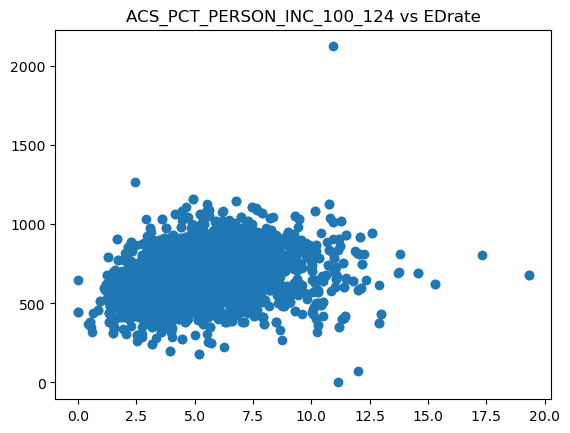

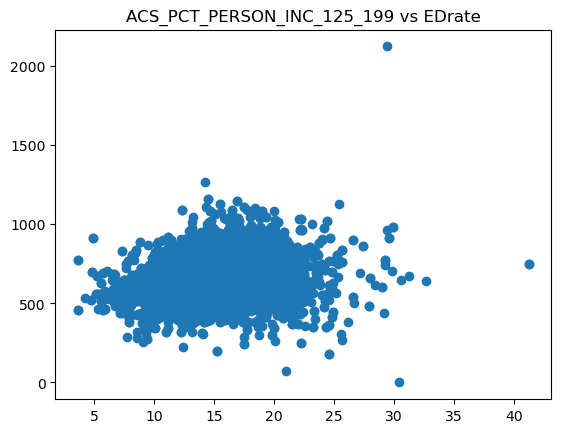

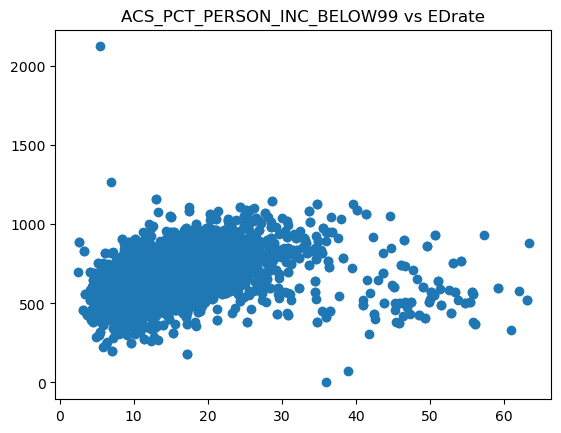

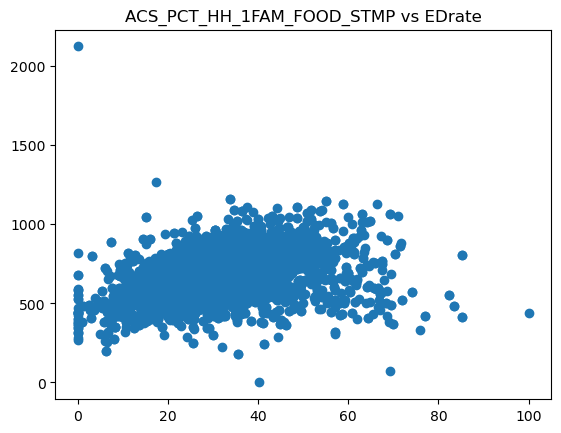

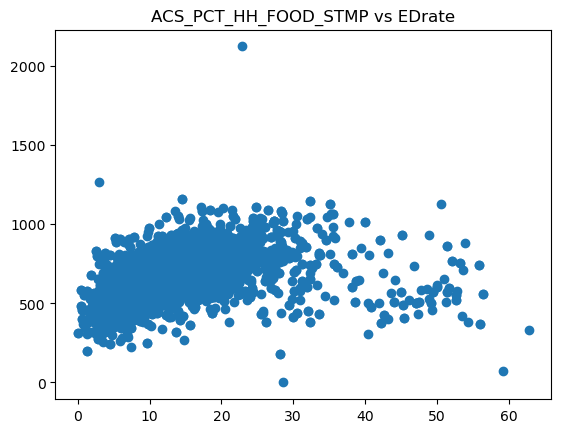

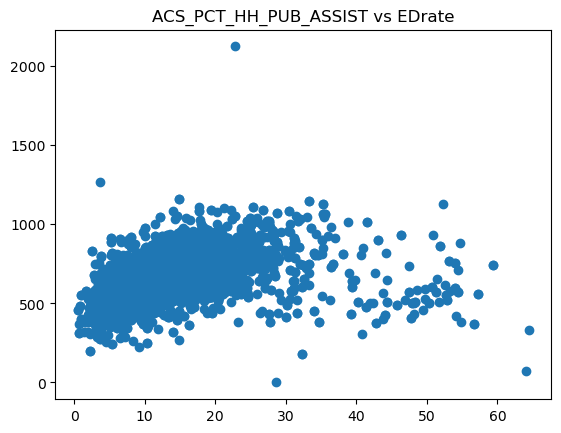

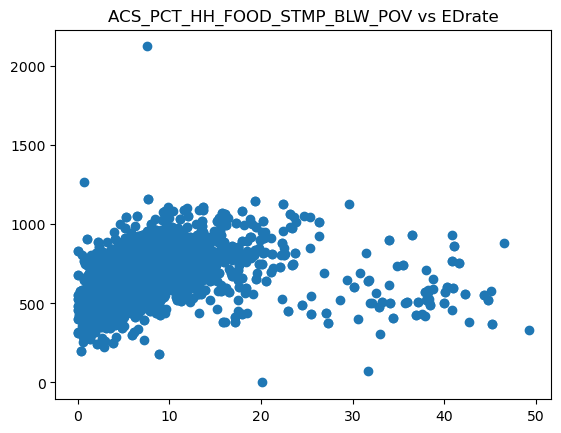

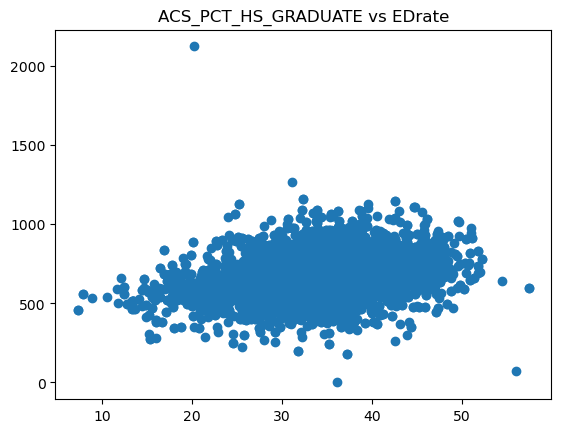

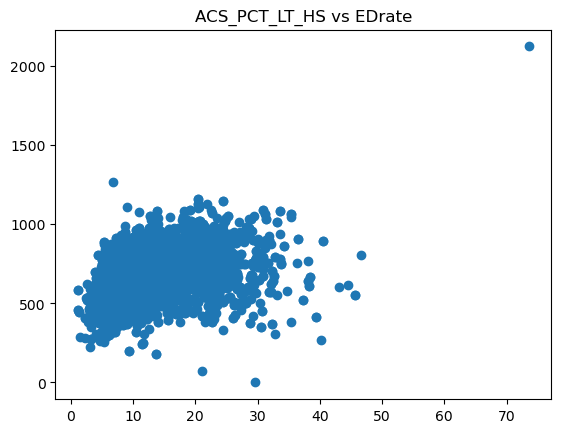

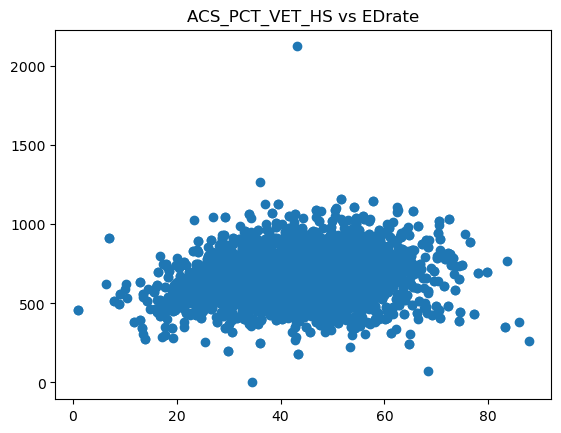

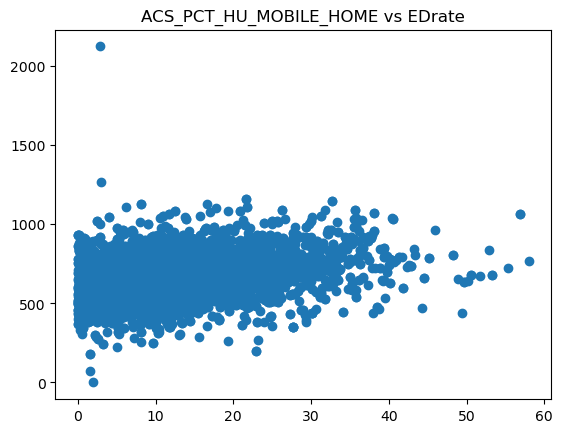

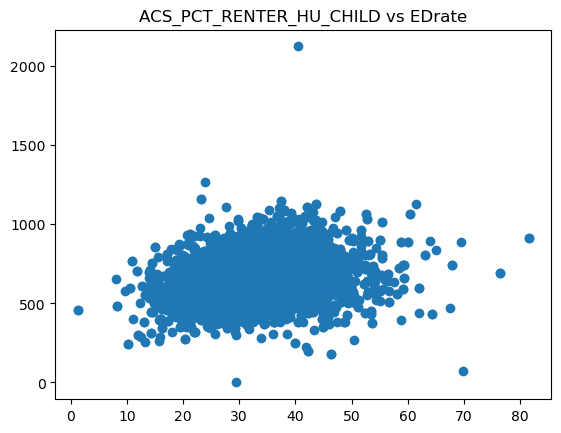

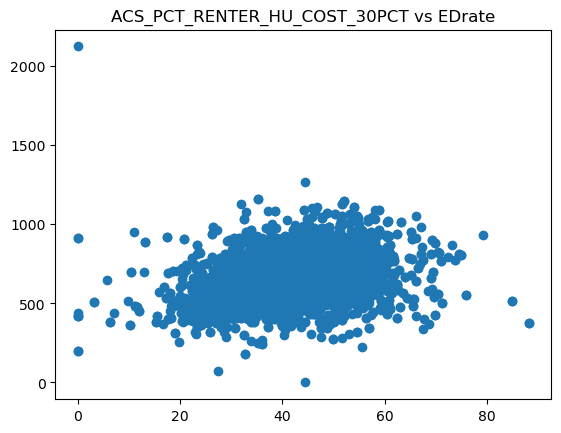

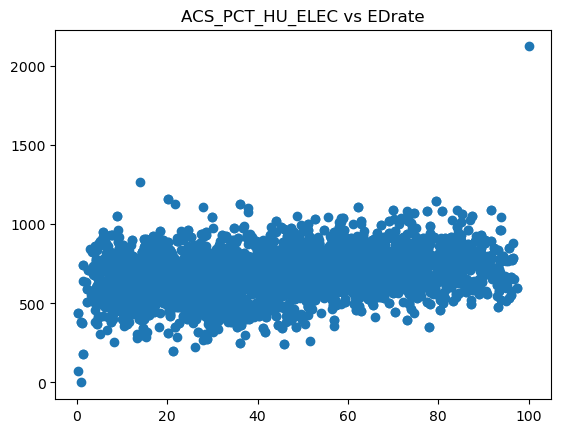

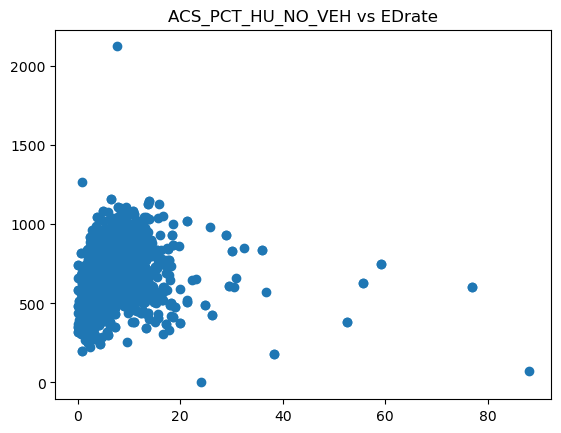

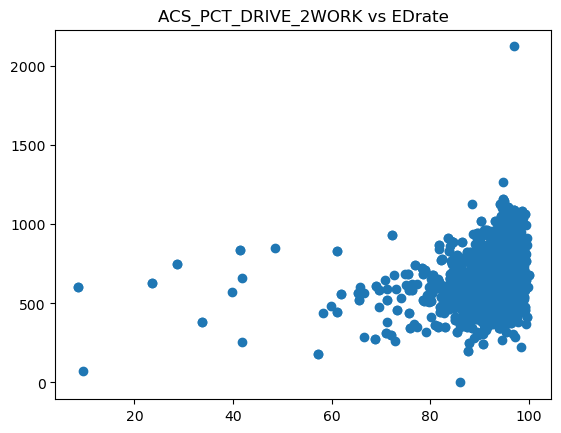

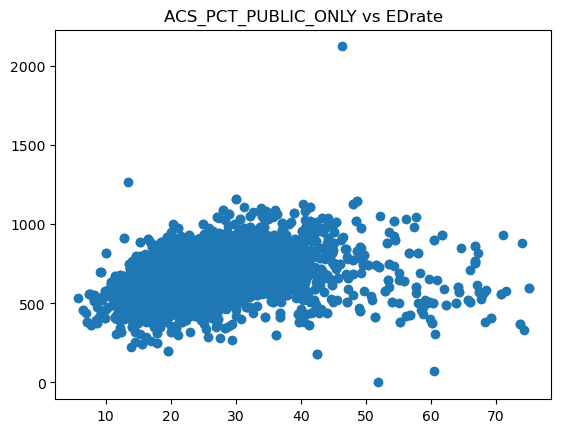

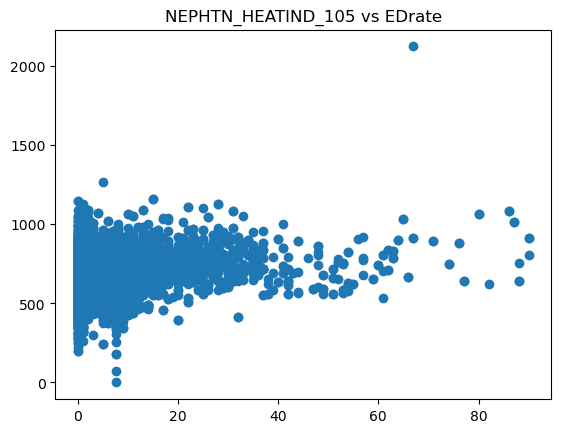

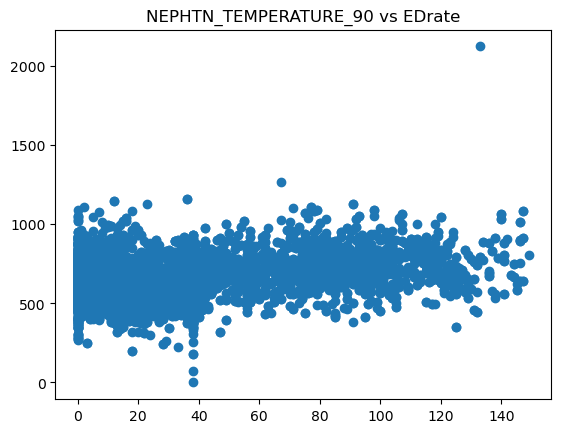

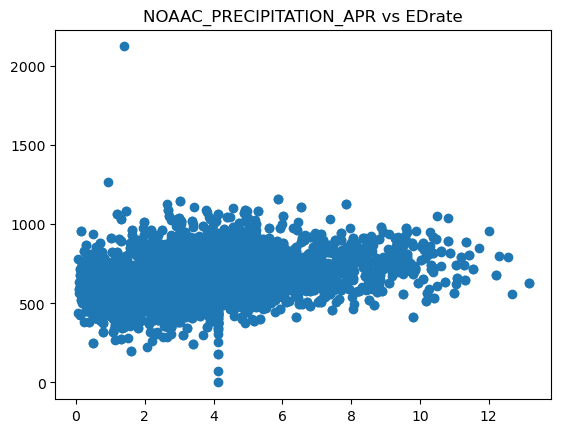

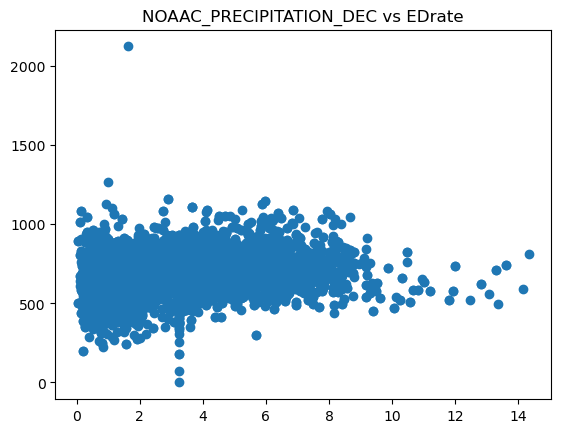

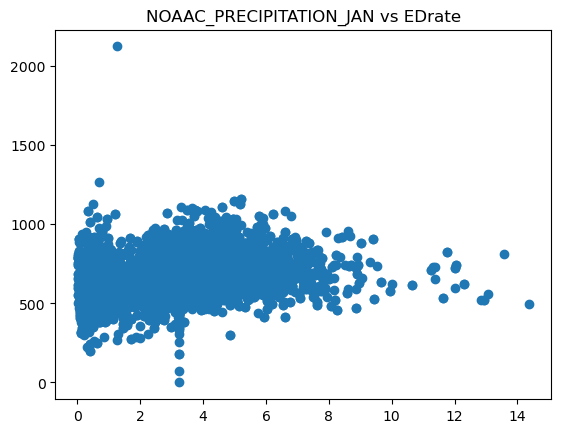

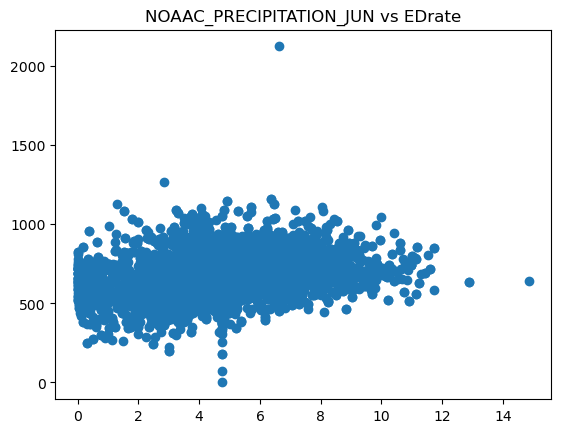

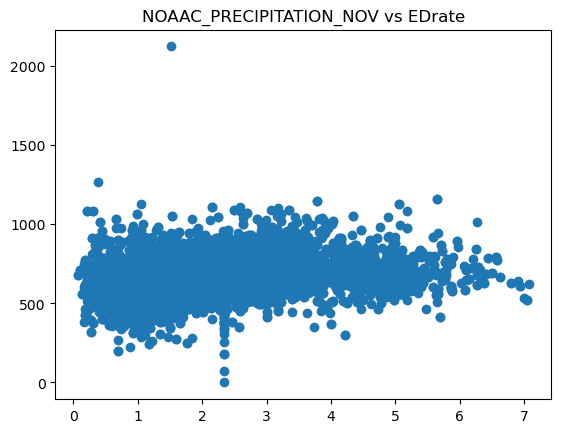

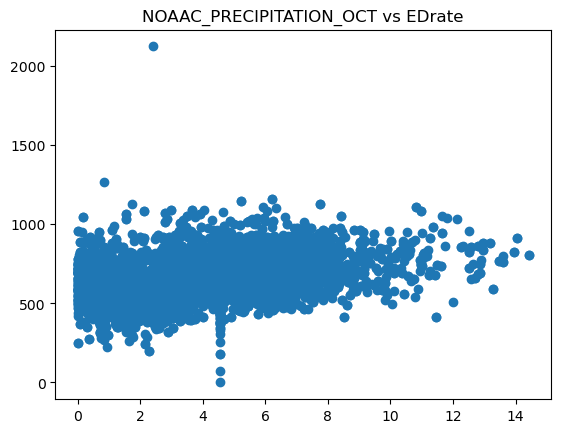

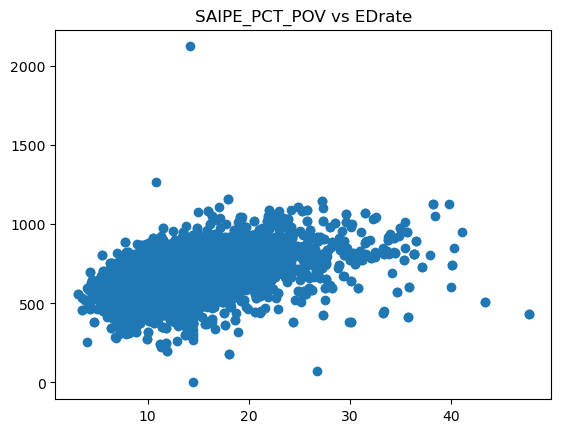

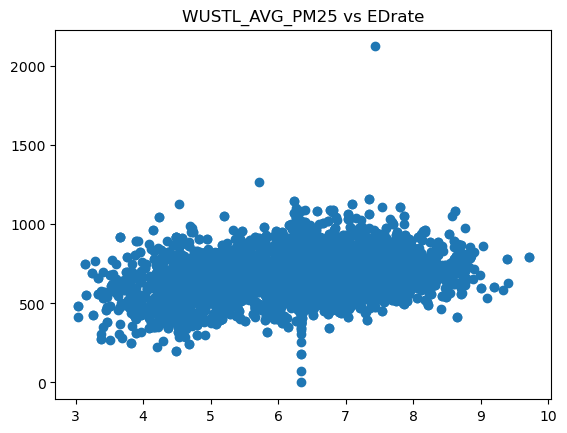

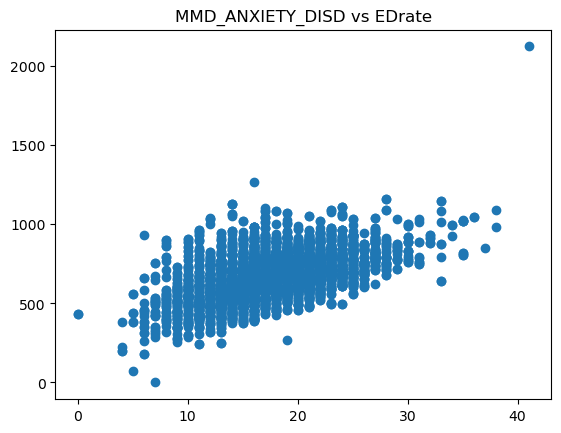

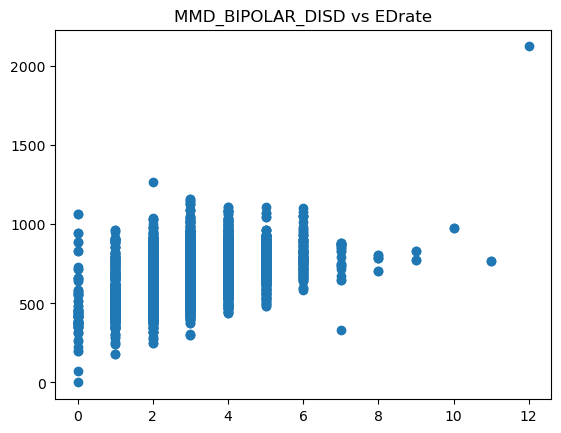

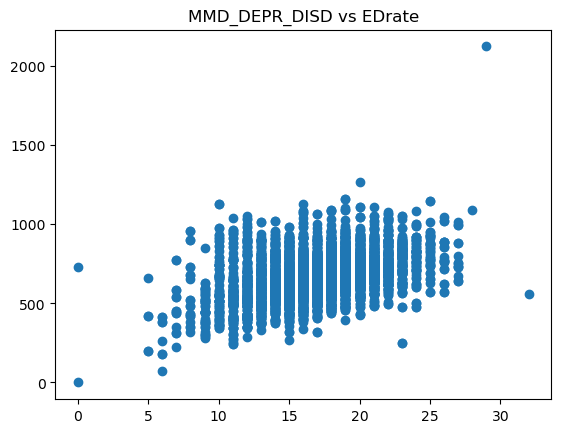

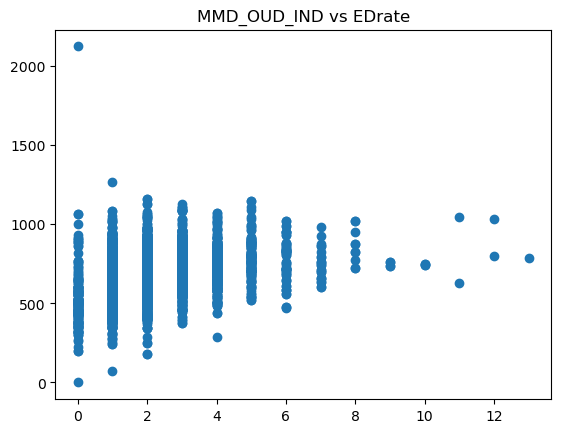

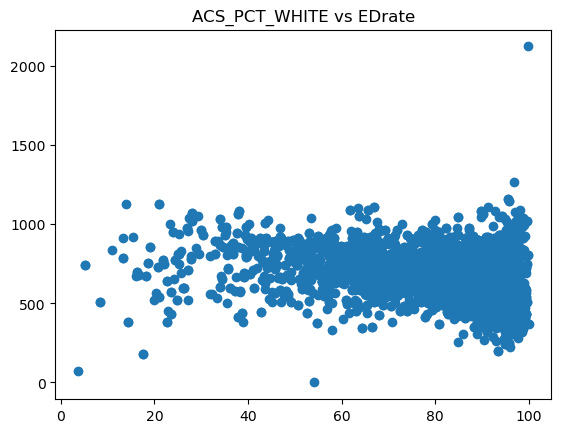

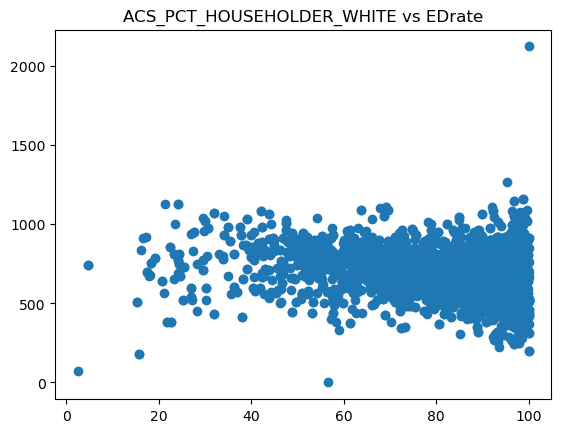

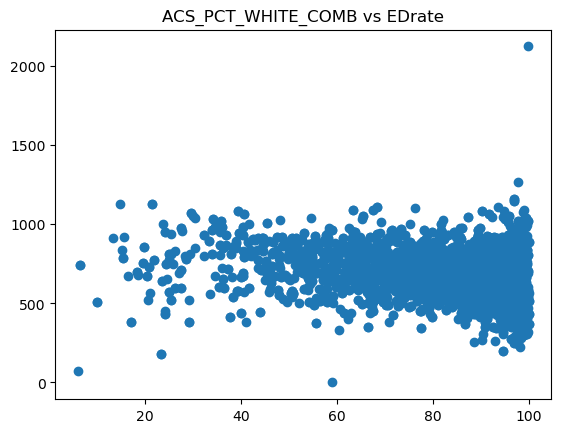

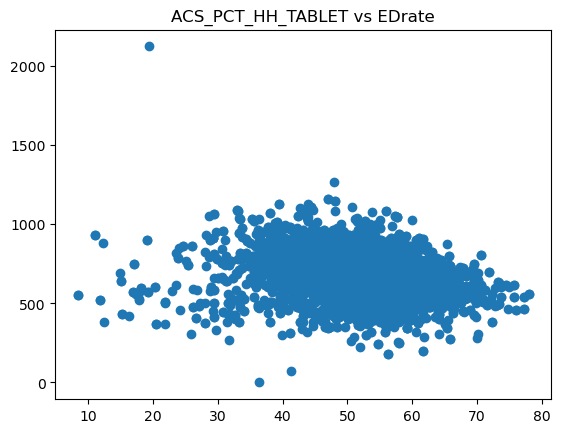

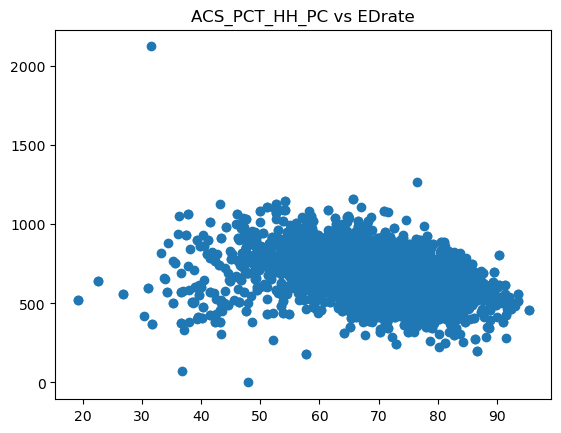

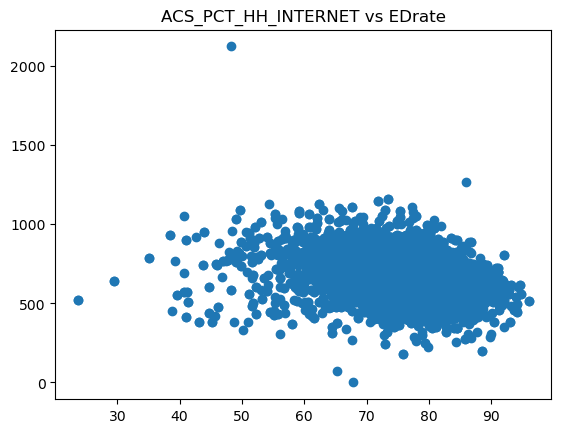

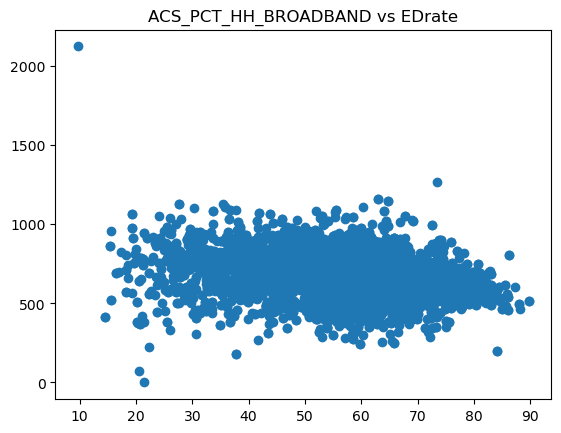

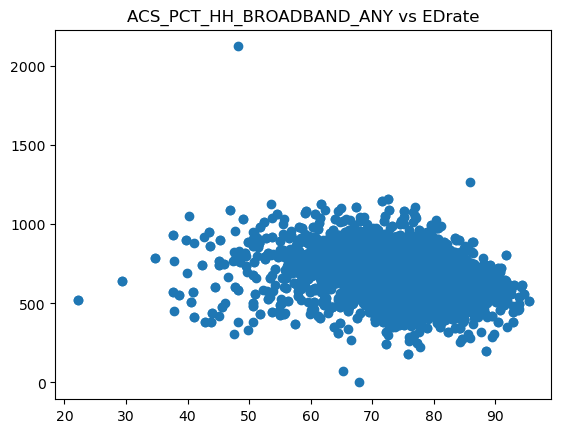

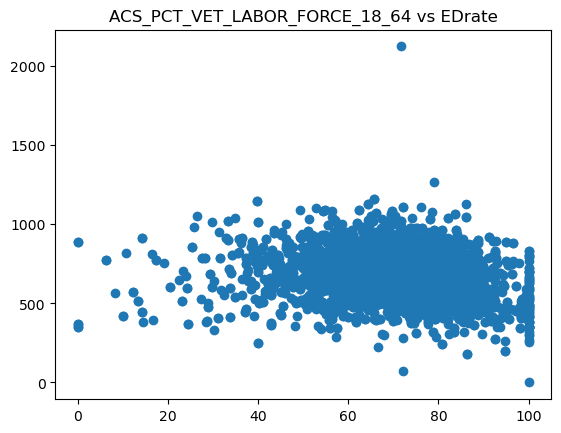

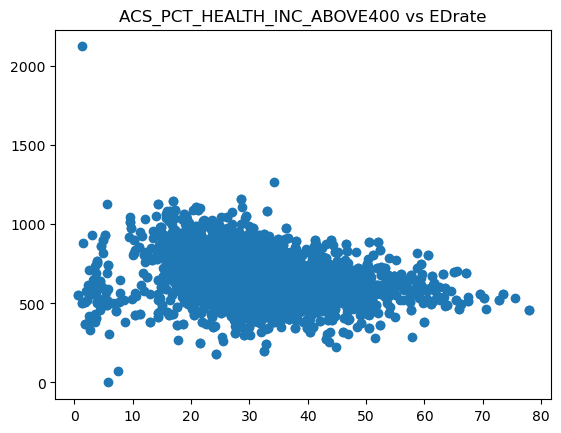

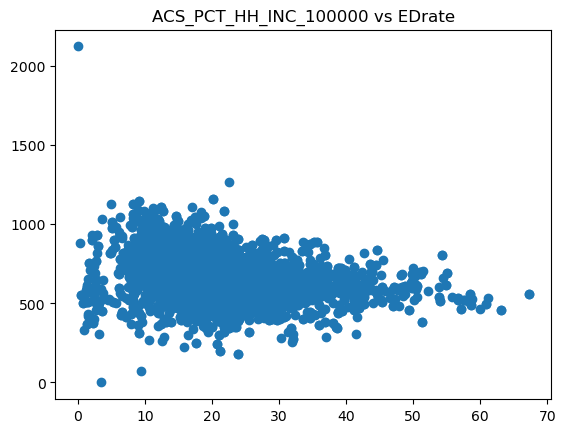

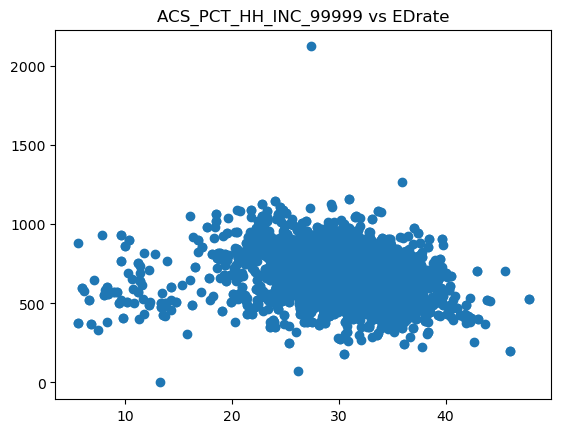

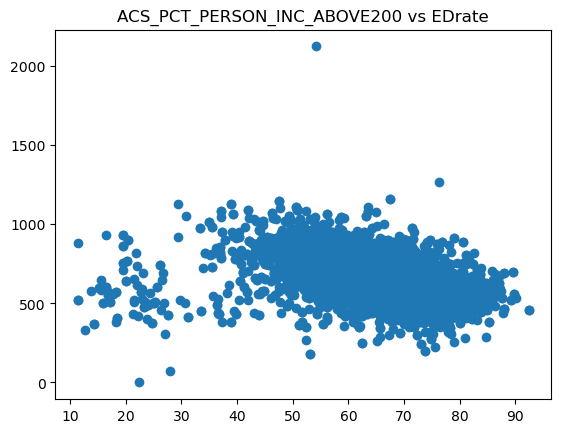

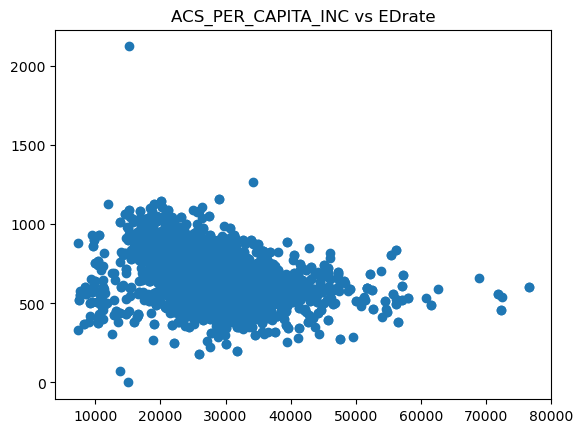

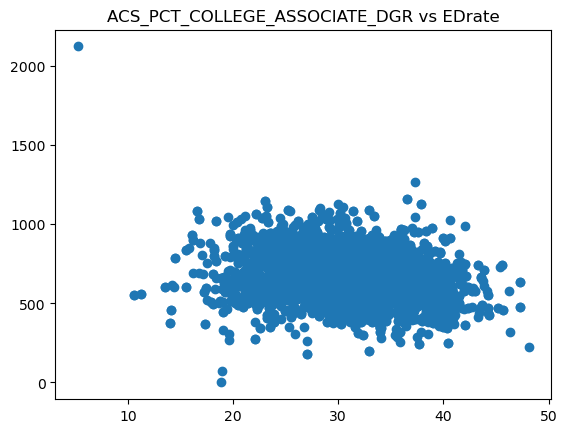

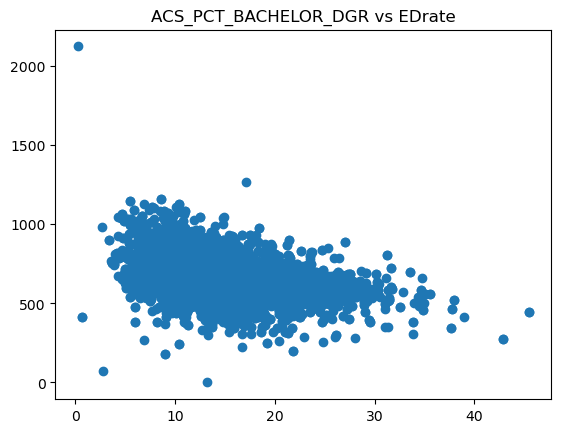

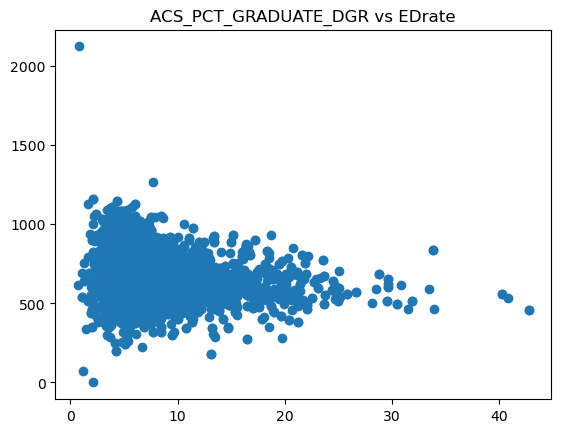

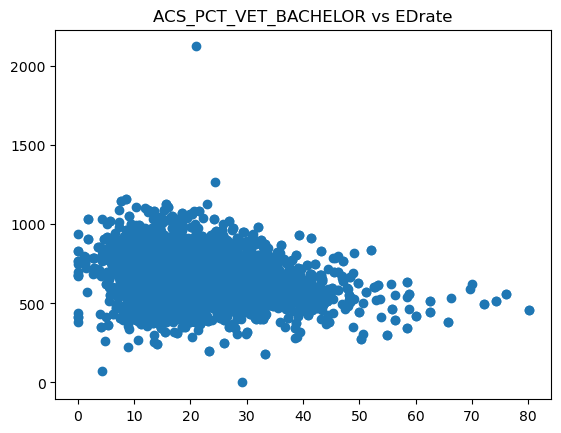

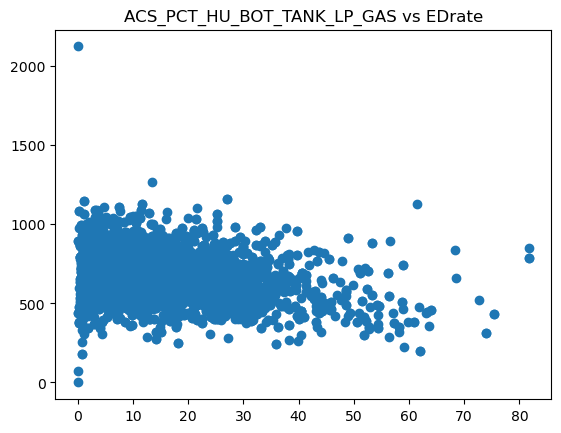

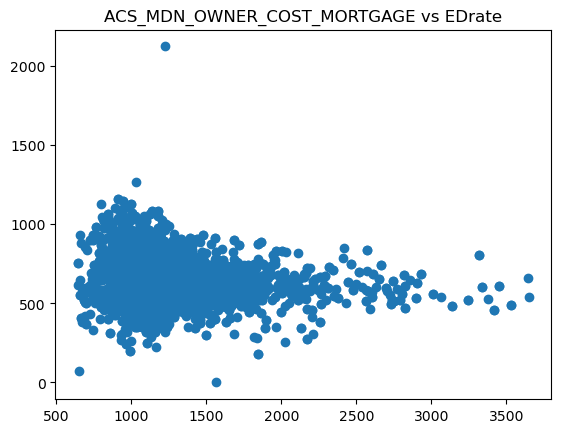

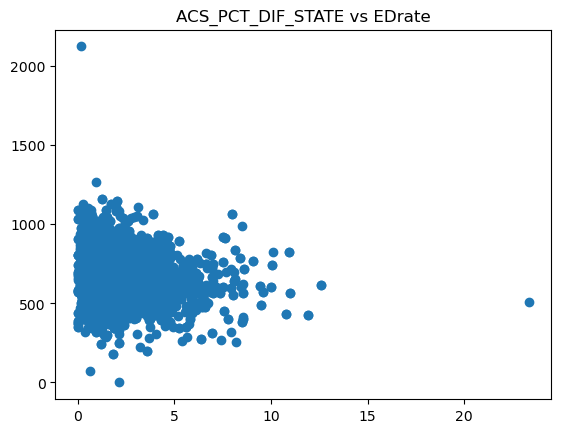

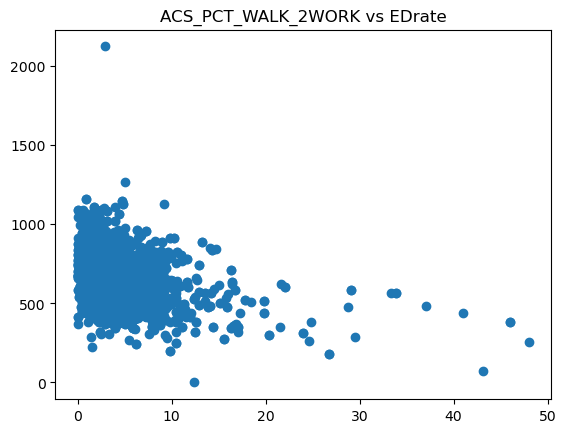

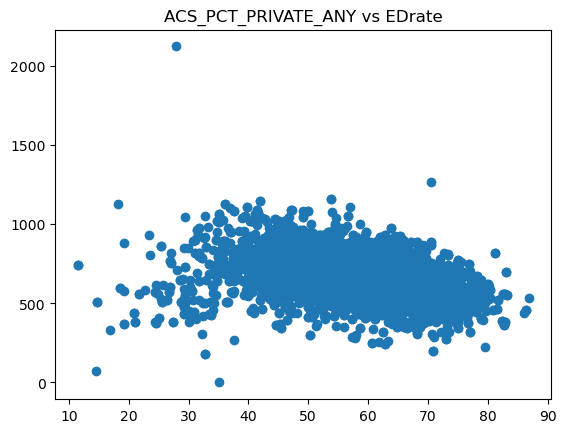

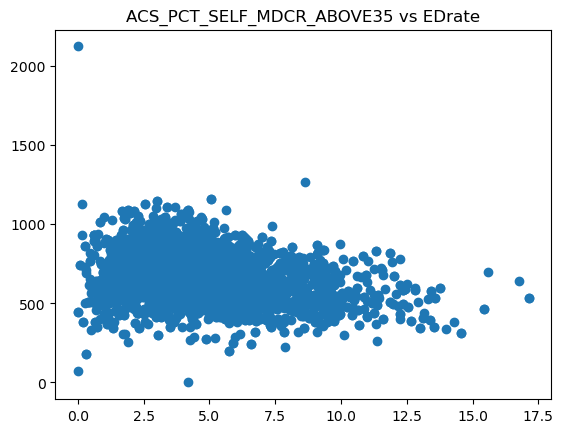

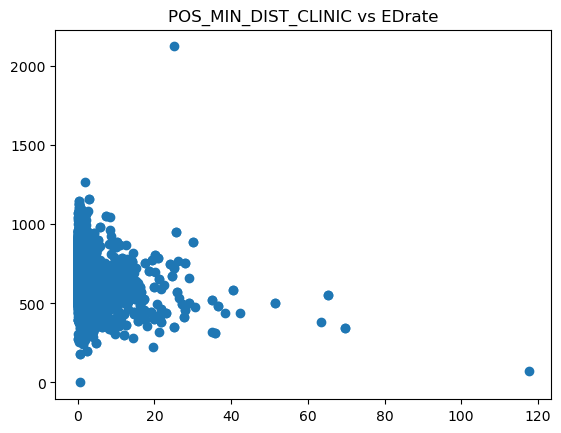

In [26]:

import matplotlib.pyplot as plt
def create_scatterplots(var='EDrate'):
    for col in finalcols:
        plt.scatter(df_impute_train[col], df_impute_train[var])
        plt.title(("{} vs {}".format(col, var)))
        plt.show()
create_scatterplots()

In [27]:
finalcols.append('PQI')
finalcols

['ACS_PCT_CHILD_DISAB',
 'ACS_PCT_DISABLE',
 'ACS_PCT_NONVET_DISABLE_18_64',
 'ACS_PCT_BLACK',
 'ACS_PCT_HOUSEHOLDER_BLACK',
 'ACS_PCT_CHILD_1FAM',
 'ACS_PCT_CHILDREN_GRANDPARENT',
 'ACS_PCT_HH_KID_1PRNT',
 'ACS_PCT_HH_NO_COMP_DEV',
 'ACS_PCT_HH_SMARTPHONE_ONLY',
 'ACS_PCT_HH_NO_INTERNET',
 'ACS_PCT_PVT_PROFIT',
 'ACS_PCT_UNEMPLOY',
 'ACS_PCT_NOT_LABOR',
 'ACS_GINI_INDEX',
 'ACS_PCT_INC50_BELOW17',
 'ACS_PCT_HEALTH_INC_BELOW137',
 'ACS_PCT_HH_INC_10000',
 'ACS_PCT_HH_INC_14999',
 'ACS_PCT_HH_INC_24999',
 'ACS_PCT_INC50',
 'ACS_PCT_NONVET_POV_18_64',
 'ACS_PCT_PERSON_INC_100_124',
 'ACS_PCT_PERSON_INC_125_199',
 'ACS_PCT_PERSON_INC_BELOW99',
 'ACS_PCT_HH_1FAM_FOOD_STMP',
 'ACS_PCT_HH_FOOD_STMP',
 'ACS_PCT_HH_PUB_ASSIST',
 'ACS_PCT_HH_FOOD_STMP_BLW_POV',
 'ACS_PCT_HS_GRADUATE',
 'ACS_PCT_LT_HS',
 'ACS_PCT_VET_HS',
 'ACS_PCT_HU_MOBILE_HOME',
 'ACS_PCT_RENTER_HU_CHILD',
 'ACS_PCT_RENTER_HU_COST_30PCT',
 'ACS_PCT_HU_ELEC',
 'ACS_PCT_HU_NO_VEH',
 'ACS_PCT_DRIVE_2WORK',
 'ACS_PCT_PUBLIC_ONLY'

The first models we're testing are logistic regression and SVM so we need to scale the data.

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train=df_impute_train[finalcols].copy(deep=True)
X_test=df_impute_test[finalcols].copy(deep=True)
y_train=df_train['HighED']
y_test=df_test['HighED']
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)



The first model I will try is a logistic regression, which yields an accuracty of 83%.


In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced').fit(X_train_scaled, y_train)

model.score(X_test_scaled, y_test)

0.7763897564022486

The confusion matrix below displays the TP, TN, FP, and FN. We also print the classification report.


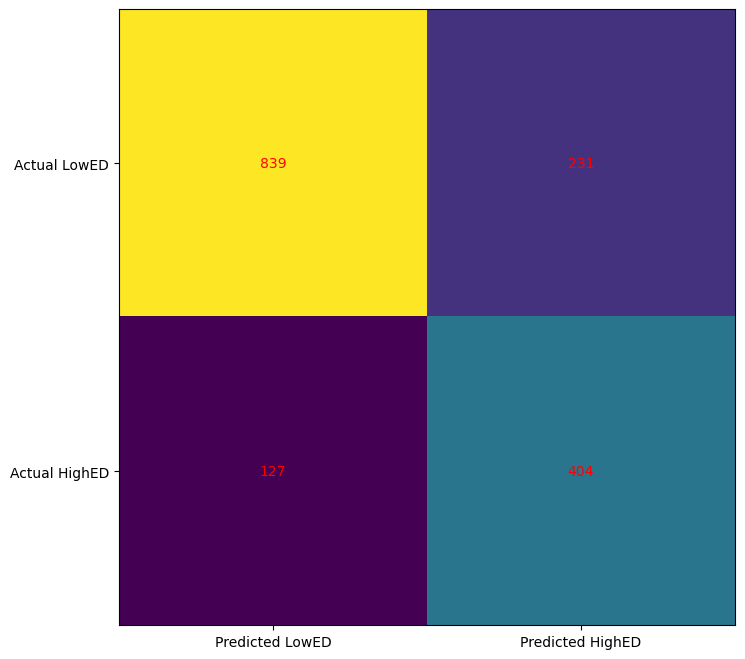

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, model.predict(X_test_scaled))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted LowED', 'Predicted HighED'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual LowED', 'Actual HighED'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [38]:
print(classification_report(y_test, model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1070
           1       0.64      0.76      0.69       531

    accuracy                           0.78      1601
   macro avg       0.75      0.77      0.76      1601
weighted avg       0.79      0.78      0.78      1601



Let's take a look at the feature importance.


In [35]:
importance = model.coef_[0]
names=X_test.columns.values
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.figure(figsize=(300, 100))
plt.bar([x for x in X_test.columns.values], importance)
plt.show()

Feature: 0, Score: 0.68326
Feature: 1, Score: -0.61093
Feature: 2, Score: 0.67104
Feature: 3, Score: 1.45515
Feature: 4, Score: 0.84319
Feature: 5, Score: 2.30311
Feature: 6, Score: 0.74780
Feature: 7, Score: -1.14479
Feature: 8, Score: -0.26790
Feature: 9, Score: -1.21408
Feature: 10, Score: -0.78666
Feature: 11, Score: -1.21300
Feature: 12, Score: 1.20212
Feature: 13, Score: -1.07069
Feature: 14, Score: -0.02731
Feature: 15, Score: -0.59846
Feature: 16, Score: -0.67153
Feature: 17, Score: 0.30201
Feature: 18, Score: -0.58216
Feature: 19, Score: 0.44520
Feature: 20, Score: -0.15357
Feature: 21, Score: -0.05704
Feature: 22, Score: -0.40622
Feature: 23, Score: -0.50046
Feature: 24, Score: -1.02744
Feature: 25, Score: 0.78955
Feature: 26, Score: 0.40462
Feature: 27, Score: 0.40768
Feature: 28, Score: -0.97105
Feature: 29, Score: -0.01746
Feature: 30, Score: 0.67356
Feature: 31, Score: 0.22011
Feature: 32, Score: -0.22004
Feature: 33, Score: 1.34245
Feature: 34, Score: 0.77154
Feature: 35

Before we start tuning the model, let's run a couple of other baselines. The next will be a Support Vector Machine.


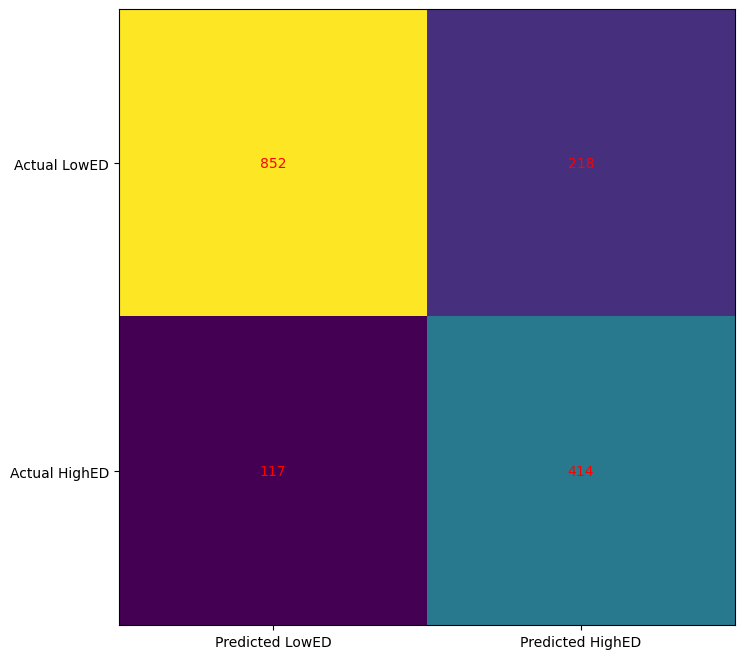

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1070
           1       0.66      0.78      0.71       531

    accuracy                           0.79      1601
   macro avg       0.77      0.79      0.77      1601
weighted avg       0.80      0.79      0.79      1601



In [39]:
from sklearn.svm import SVC
clf=SVC(class_weight='balanced')
clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)
cm = confusion_matrix(y_test, clf.predict(X_test_scaled))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted LowED', 'Predicted HighED'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual LowED', 'Actual HighED'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(y_test, clf.predict(X_test_scaled)))

Next let's test out a Random Forest Classifier.

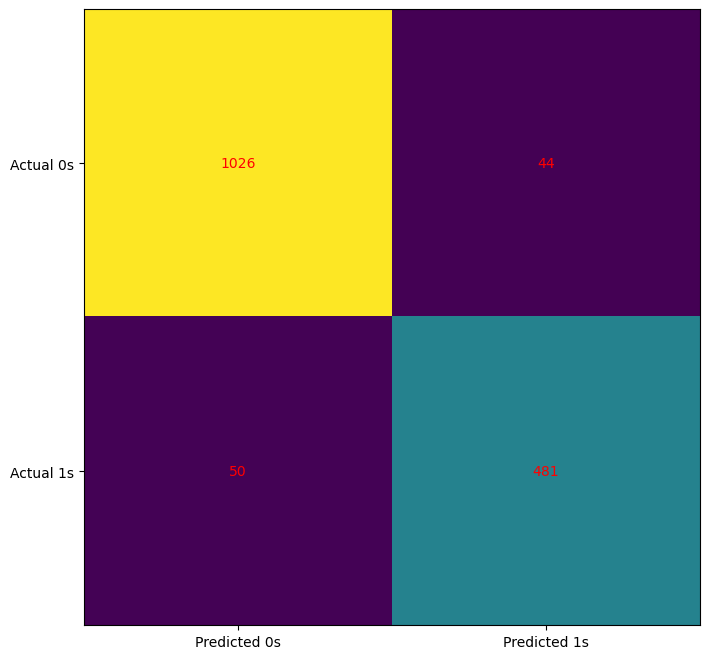

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1070
           1       0.92      0.91      0.91       531

    accuracy                           0.94      1601
   macro avg       0.93      0.93      0.93      1601
weighted avg       0.94      0.94      0.94      1601



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier( max_features=None, random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
cm = confusion_matrix(y_test, clf.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(y_test, clf.predict(X_test)))

Finally, let's try an XGBoost Classifier

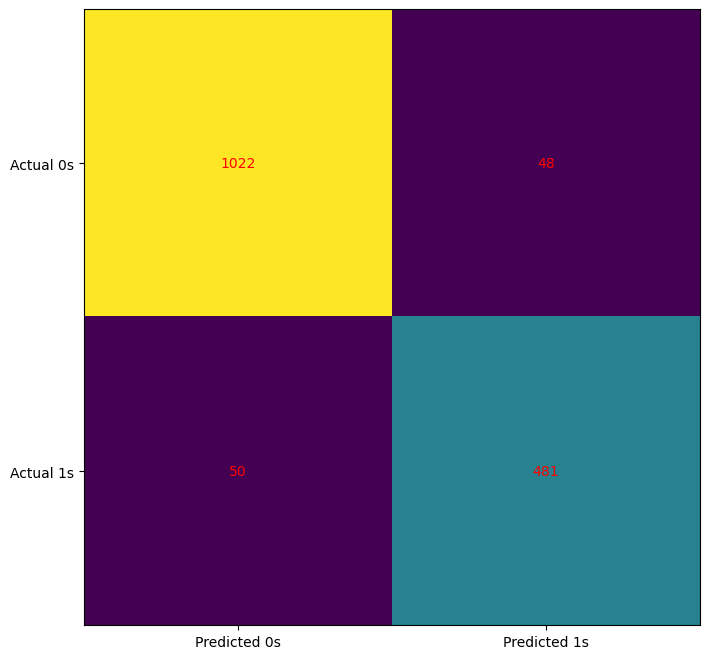

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1070
           1       0.91      0.91      0.91       531

    accuracy                           0.94      1601
   macro avg       0.93      0.93      0.93      1601
weighted avg       0.94      0.94      0.94      1601



In [41]:

import xgboost as xgb

# Init classifier
xgb_cl = xgb.XGBClassifier(random_state=0)

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)
cm = confusion_matrix(y_test, xgb_cl.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(y_test, xgb_cl.predict(X_test)))

As of now, I'm leaning toward the Random Forest model based on the classification reports. 